In [6]:
#회귀
from keras.models import Sequential #models 서브패키지
from keras.layers import Dense #layers 모델구성
from sklearn.datasets import make_regression

#MinMaxScaler 신경망-정규화
from sklearn.preprocessing import MinMaxScaler

#훈련데이터
#X=100x2 y=100
X,y=make_regression(n_samples=100,n_features=2,
                   noise=0.1,random_state=1)   #noise 를 주면 학습이 잘됨
scalarX,scalarY=MinMaxScaler(),MinMaxScaler() #값의 범위가 (데이터사이즈가) 다르므로 
scalarX.fit(X)
scalarY.fit(y.reshape(100,1)) #y=100 열, 행으로 만들어 주기 위해 
X=scalarX.transform(X)
y=scalarY.transform(y.reshape(100,1))

#케라스모델시작 
model=Sequential()
#layer depth
#100x2 출력차수지정, 2x4 의 가중치(의 차수를 자동으로 맞춰줌), 결과는 100x4
model.add(Dense(4,input_dim=2,activation='relu'))  #ffnn 만들때
#100x4(출력이 입력으로) 4x4 100x4
model.add(Dense(4,activation='relu'))
#100x4 4x1 100x1 예측
model.add(Dense(1,activation='linear'))
#backend=tensorflow 
#mse, cross entropy kl_divergence 
model.compile(loss='mse',optimizer='adam') #tensorflow 로 모델을 변환
model.fit(X,y,epochs=1000,verbose=0) #2개의 for문 대신 verbose=0 은 출력여부 no


#예측(테스트데이터)
Xnew,a=make_regression(n_samples=3,n_features=2,noise=0.1,random_state=1) #a를 쓴 이유:make_regression x,y 값이 필요함(앞:x값 뒤:y값)
Xnew=scalarX.transform(Xnew)
ynew=model.predict(Xnew)

for i in range(len(Xnew)):
    print('입력데이터=%s,예측결과=%s' %(Xnew[i],ynew[i]))
    




입력데이터=[0.29466096 0.30317302],예측결과=[0.1730334]
입력데이터=[0.39445118 0.79390858],예측결과=[0.7441898]
입력데이터=[0.02884127 0.6208843 ],예측결과=[0.40246361]


In [5]:
from keras.models import Sequential #models 서브패키지
from keras.layers import Dense #layers 모델구성
from sklearn.datasets import make_regression
import numpy 
numpy.random.seed(7)
dataset=numpy.loadtxt('pima.data',delimiter=',')
X=dataset[:,0:8] #8개의 독립변수
Y=dataset[:,8] #종속변수 8번째 독립변수의 종속변수를 모름(768이긴하지만) 
print(X.shape)
print(Y.shape)

model=Sequential()
#? x 8 8x12=>?x12
model.add(Dense(12,input_dim=8, kernel_initializer='uniform', activation='relu'))
#?x12 12x8 =>?x8                                #초기화:균등분포
model.add(Dense(8, activation='relu'))
#?x8 8x1->?X1
model.add(Dense(1,activation='sigmoid')) #분류 0.5 기준으로 크면 1 작으면 0
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) 


#model.fit(X,Y,epochs=150,batch_size=10)
#데이터 분리 입력 (train, test):과적합
#train, validation ,test
history=model.fit(X,Y,validation_split=0.33, epochs=150,batch_size=10)
scores=model.evaluate(X,Y) #accuracy 를 출력해줌


#1번 loss ,2번째 accuracy (metrics=['accuracy'])??
print('\n%s:%.2f%%' % (model.metrics_names[1],scores[1]*100))

          

Using TensorFlow backend.


(768, 8)
(768,)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 1s 1ms/step - loss: 0.6904 - accuracy: 0.6595 - val_loss: 0.6552 - val_accuracy: 0.6575
Epoch 2/150
514/514 [==============================] - 0s 107us/step - loss: 0.6549 - accuracy: 0.6342 - val_loss: 0.6316 - val_accuracy: 0.6614
Epoch 3/150
514/514 [==============================] - 0s 112us/step - loss: 0.6469 - accuracy: 0.6381 - val_loss: 0.6260 - val_accuracy: 0.6654
Epoch 4/150
514/514 [==============================] - 0s 111us/step - loss: 0.6367 - accuracy: 0.6556 - val_loss: 0.6277 - val_accuracy: 0.6654
Epoch 5/150
514/514 [==============================] - 0s 107us/step - loss: 0.6269 - accuracy: 0.6537 - val_loss: 0.6229 - val_accuracy: 0.6693
Epoch 6/150
514/514 [==============================] - 0s 103us/step - loss: 0.6185 - accuracy: 0.6654 - val_loss: 0.629

514/514 [==============================] - 0s 100us/step - loss: 0.5601 - accuracy: 0.6946 - val_loss: 0.5860 - val_accuracy: 0.7047
Epoch 54/150
514/514 [==============================] - 0s 100us/step - loss: 0.5657 - accuracy: 0.6887 - val_loss: 0.5752 - val_accuracy: 0.6969
Epoch 55/150
514/514 [==============================] - 0s 100us/step - loss: 0.5600 - accuracy: 0.6907 - val_loss: 0.6229 - val_accuracy: 0.7087
Epoch 56/150
514/514 [==============================] - 0s 103us/step - loss: 0.5736 - accuracy: 0.6693 - val_loss: 0.5854 - val_accuracy: 0.6969
Epoch 57/150
514/514 [==============================] - 0s 100us/step - loss: 0.5727 - accuracy: 0.6887 - val_loss: 0.5760 - val_accuracy: 0.7047
Epoch 58/150
514/514 [==============================] - 0s 100us/step - loss: 0.5563 - accuracy: 0.6984 - val_loss: 0.6079 - val_accuracy: 0.6693
Epoch 59/150
514/514 [==============================] - 0s 101us/step - loss: 0.5695 - accuracy: 0.6712 - val_loss: 0.5965 - val_accuracy

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


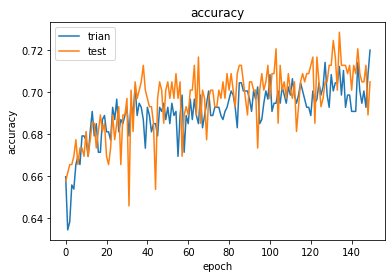

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

print(history.history.keys())

#val_loss,val_accuracy,loss,accuracy :4개 나옴

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['trian','test'],loc='upper left')

plt.show()

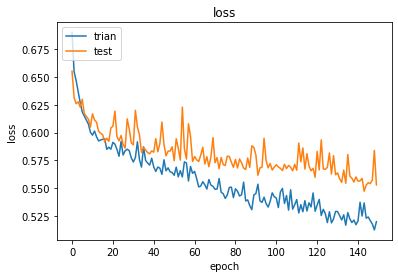

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['trian','test'],loc='upper left')
plt.show()

In [8]:
########여기서부터 

In [9]:
from sklearn.preprocessing import scale
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,Y=make_moons(noise=0.2, random_state=0, n_samples=1000)
X=scale(X)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.5)
print(X.shape)
print(Y.shape)

(1000, 2)
(1000,)


[Text(0, 0.5, 'Y'),
 Text(0.5, 0, 'X'),
 Text(0.5, 1.0, 'history classification')]

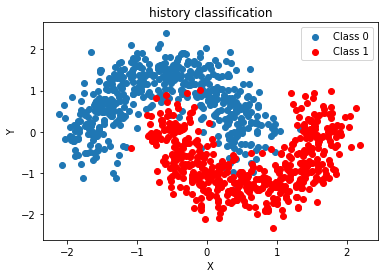

In [10]:
fig,ax=plt.subplots()
ax.scatter(X[Y==0,0],X[Y==0,1],label='Class 0')
ax.scatter(X[Y==1,0],X[Y==1,1],color='r',label='Class 1')
ax.legend()
ax.set(xlabel='X',ylabel='Y',title='history classification')

In [11]:
X_train.shape

(500, 2)

In [12]:
import keras
# 비선형일 때 신경망을 사용한다.
model = Sequential()
# 입력데이터 1000x2 2x32 => 1000x32 (차원확대 2->32 => 설명이 잘된다) 
#param 96인 이유 2x32=64 +(가중치)32=96 !!!!!!
model.add(Dense(32, input_dim=2, activation="relu"))
# 1000x32 32x1 => 1000x1(분류)
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="AdaDelta", loss="binary_crossentropy", metrics=["accuracy"])

# callback함수 : winodows에서 event후에 자동으로 호출되어지는 함수
# graph image 출력
tb_callback = keras.callbacks.TensorBoard(log_dir="./Graph/model_1/",
                                          histogram_freq=100,
                                          write_graph=True,
                                          write_images=False)
tb_callback.set_model(model) # callback함수를 model에 등록

In [13]:
hist = model.fit(X_train, Y_train, batch_size=32, epochs=200, verbose=0, validation_data=(X_test, Y_test), callbacks=[tb_callback])


In [14]:
score=model.evaluate(X_test,Y_test,verbose=0)
print('test loss:',score[0])
print('test accuracy:',score[1])

test loss: 0.12789358568191528
test accuracy: 0.949999988079071


In [15]:
keras.utils.print_summary(model)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [17]:
#conda install graphviz
#conda install pydot
#import pydot
from keras.utils.vis_utils import model_to_dot
model_to_dot(model)

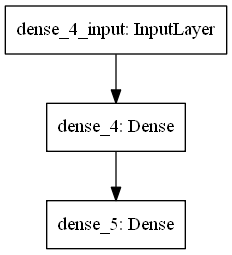

In [21]:
from keras.utils import plot_model
plot_model(model)

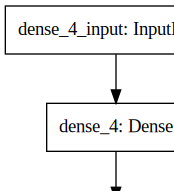

In [22]:
from IPython.display import Image, SVG
SVG(model_to_dot(model).create(prog='dot',format='svg'))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [34]:
from keras.datasets import mnist
import matplotlib.pylab as plt
(X_train0,y_train0),(X_test0,y_test0)=mnist.load_data()
print(X_train0.shape, X_train0.dtype) #60000, 28x28  원본이미지 보통 인터넷에서 다운받으면 640 x 640
print(y_train0.shape, y_train0.dtype) #60000
print(X_test0.shape, X_test0.dtype) #10000 28x28
print(y_test0.shape, y_test0.dtype) #10000 28x28

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


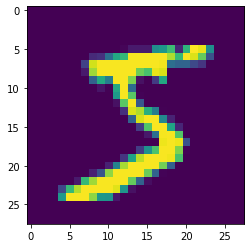

In [35]:
plt.imshow(X_train0[0])
plt.grid(False)
plt.show()


In [36]:
#fully-connected:flatten :ffnn 은 
#이미지 정규화 :0~255 컬러값 /255  => 0~1
X_train=X_train0.reshape(60000,784).astype('float32')/255.0  
X_test=X_test0.reshape(10000,784).astype('float32')/255.0
print(X_train.shape, X_train.dtype) 


(60000, 784) float32


In [37]:
y_train0[:5] #one hot encoding 여부 
#:multi label일 경우 sotfmax사용 (경우의 수에 대한 확률값) -3개 이상인 경우 사용!! 2개일때는 (binary.....)
#5, 0, 4, 1, 9 :원핫인코딩이 안되어 있음

array([5, 0, 4, 1, 9], dtype=uint8)

In [38]:
from keras.utils import np_utils
Y_train=np_utils.to_categorical(y_train0,10)
Y_test=np_utils.to_categorical(y_test0,10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [39]:
import numpy as np
from keras.optimizers import SGD

np.random.seed(0)
model=Sequential()

#60000x784 ,784 x 15 =>60000x15
model.add(Dense(512,input_dim=784,activation='sigmoid'))
model.add(Dense(15))
#60000x15 15x10 =>60000x 10
model.add(Dense(10,activation='sigmoid')) #확률값으로 출력
#lr:learning rate
#stochastic gradient descent
model.compile(optimizer=SGD(lr=0.2),loss='mean_squared_error',metrics=['accuracy'])

In [40]:
model.layers

In [41]:
l1=model.layers[0]
l2=model.layers[1]
#레이어 속성으로 정보 확인
l1.name
l1.input_shape
l1.output_shape
l1.activation

<function keras.activations.sigmoid(x)>

In [42]:
#callbacks class 
#Custom callbacks 함수의 제작
#함수에 의해서 호출되는 객체
import keras
class CustomHistory(keras.callbacks.Callback): #상속
    def init(self):
        self.train_loss=[]
        self.val_loss=[]
        self.train_acc=[]
        self.val_acc=[]
    def on_epoch_end(self,batch,logs={}): #오버라이딩
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('accuracy'))
        self.val_loss.append(logs.get('val_loss'))

In [43]:
#callback function 사용
custom_hist=CustomHistory()
custom_hist.init()
hist=model.fit(X_train,Y_train,nb_epoch=30,batch_size=1000,validation_data=(X_test,Y_test),verbose=2,callbacks=[custom_hist])


C:\Users\ICT01_15\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 1s - loss: 0.1022 - accuracy: 0.1207 - val_loss: 0.0894 - val_accuracy: 0.1868
Epoch 2/30
 - 1s - loss: 0.0889 - accuracy: 0.2013 - val_loss: 0.0884 - val_accuracy: 0.2180
Epoch 3/30
 - 1s - loss: 0.0880 - accuracy: 0.2581 - val_loss: 0.0874 - val_accuracy: 0.3206
Epoch 4/30
 - 1s - loss: 0.0870 - accuracy: 0.3395 - val_loss: 0.0863 - val_accuracy: 0.3785
Epoch 5/30
 - 1s - loss: 0.0858 - accuracy: 0.3882 - val_loss: 0.0850 - val_accuracy: 0.4014
Epoch 6/30
 - 1s - loss: 0.0845 - accuracy: 0.4065 - val_loss: 0.0836 - val_accuracy: 0.4366
Epoch 7/30
 - 1s - loss: 0.0831 - accuracy: 0.4326 - val_loss: 0.0821 - val_accuracy: 0.4714
Epoch 8/30
 - 1s - loss: 0.0815 - accuracy: 0.4549 - val_loss: 0.0804 - val_accuracy: 0.4979
Epoch 9/30
 - 1s - loss: 0.0798 - accuracy: 0.4837 - val_loss: 0.0786 - val_accuracy: 0.5107
Epoch 10/30
 - 1s - loss: 0.0779 - accuracy: 0.5049 - val_loss: 0.0767 - val_accuracy: 0.5277
Epoch 11/30
 - 1s -

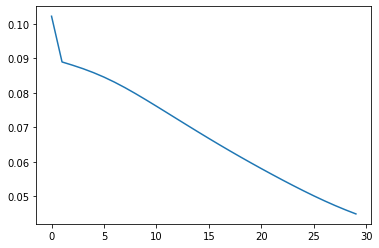

{'val_loss': [0.08938412368297577,
  0.0883925773203373,
  0.08740723133087158,
  0.08630768582224846,
  0.08504326641559601,
  0.08363822847604752,
  0.08207345530390739,
  0.08037374168634415,
  0.07855112999677658,
  0.0766752801835537,
  0.07475815713405609,
  0.07283084094524384,
  0.070909383893013,
  0.06899746805429459,
  0.06709608696401119,
  0.06520821079611779,
  0.06337240971624851,
  0.061587801203131676,
  0.0597979623824358,
  0.058061642199754716,
  0.056354080140590665,
  0.054682868719100955,
  0.05303945504128933,
  0.05147535242140293,
  0.049891619384288786,
  0.04839757010340691,
  0.04698770046234131,
  0.045660673081874846,
  0.04440286532044411,
  0.04326608330011368],
 'val_accuracy': [0.1868000030517578,
  0.21799999475479126,
  0.3206000030040741,
  0.3785000145435333,
  0.40139999985694885,
  0.436599999666214,
  0.4713999927043915,
  0.49790000915527344,
  0.510699987411499,
  0.5277000069618225,
  0.5522000193595886,
  0.5690000057220459,
  0.59700000286

In [32]:
plt.plot(hist.history['loss'])  #영택이거랑 다름
plt.show()
hist.history

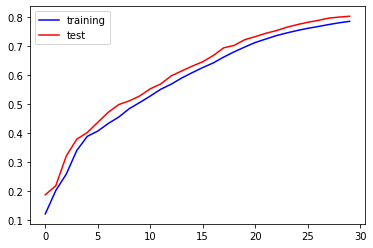

{'batch_size': 1000, 'epochs': 30, 'steps': None, 'samples': 60000, 'verbose': 2, 'do_validation': True, 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}


KeyError: 'acc'

In [44]:
plt.plot(hist.history['accuracy'],'b-',label='training')
plt.plot(hist.history['val_accuracy'],'r-',label='test')
plt.legend()
plt.show()

print(hist.model)
print(hist.params)
print(hist.history['acc'])
print(hist.hisrory['vall_accracy'][29])
plt.show()
plt.plot(custom_hist.train_loss, 'y', label='train loss')
plt.show()

In [ ]:
######문제 X_test 의 이미지 한장의 label 을 예측해보시오

In [ ]:
model.predict(X_test[:1,:])

In [ ]:
model.predict_classes(X_test[:1,:],verbose=0) #넘버로 바꿔줌....

In [ ]:
#######문제 :출력 차수가 512인 레이어를 추가하시오 (위)

In [ ]:
#집값예측
from keras.datasets import boston_housing
(x_train, y_train),(x_test,y_test)=boston_housing.load_data()
print(x_train.shape)
print(y_train.shape)

In [ ]:
model=Sequential()
num_features=13
model.add(Dense(1,input_dim=num_features,activation='linear'))

In [ ]:
model.summary()
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
model.fit(x_train,y_train,batch_size=1,epochs=10,verbose=1)

In [ ]:
#accuracy 였는데 바뀐이유:loss='mse',metrics=['mae']
mse,mae=model.evaluate(x_test,y_test,verbose=False)
rmse=np.sqrt(mse)
mse,rmse,mae

In [ ]:
#########문제 :x_test 의 앞의 3집을 예측해 보시오


In [ ]:
pred=model.predict(X_test[:3,:])

In [ ]:
real=y_test[:3]

In [ ]:
#상관계수를 확인하시오

In [ ]:
import numpy as np
np.corrcoef(pred,real)

In [ ]:
import numpy 
from sklearn.model_selection import GridSearchCV
from keras.mo